In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [6]:
df = pd.read_csv("electric_vehicle_analytics.csv")
df.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


In [7]:
import seaborn as sns
sns.set(color_codes=True)

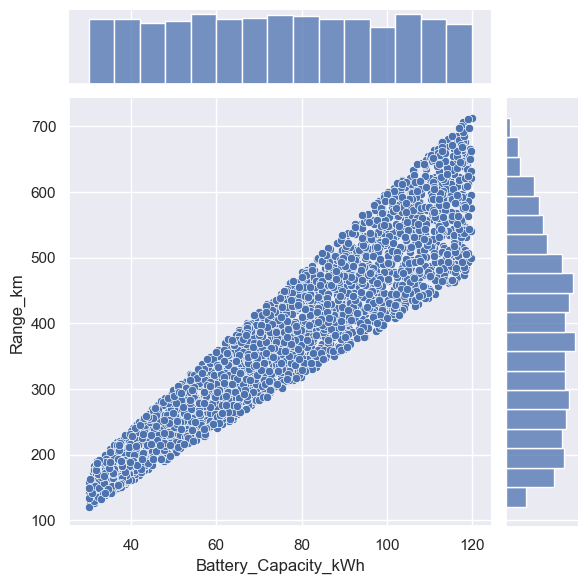

In [9]:
sns.jointplot(x='Battery_Capacity_kWh', y='Range_km', data=df)

In [10]:
import matplotlib.pyplot as plt

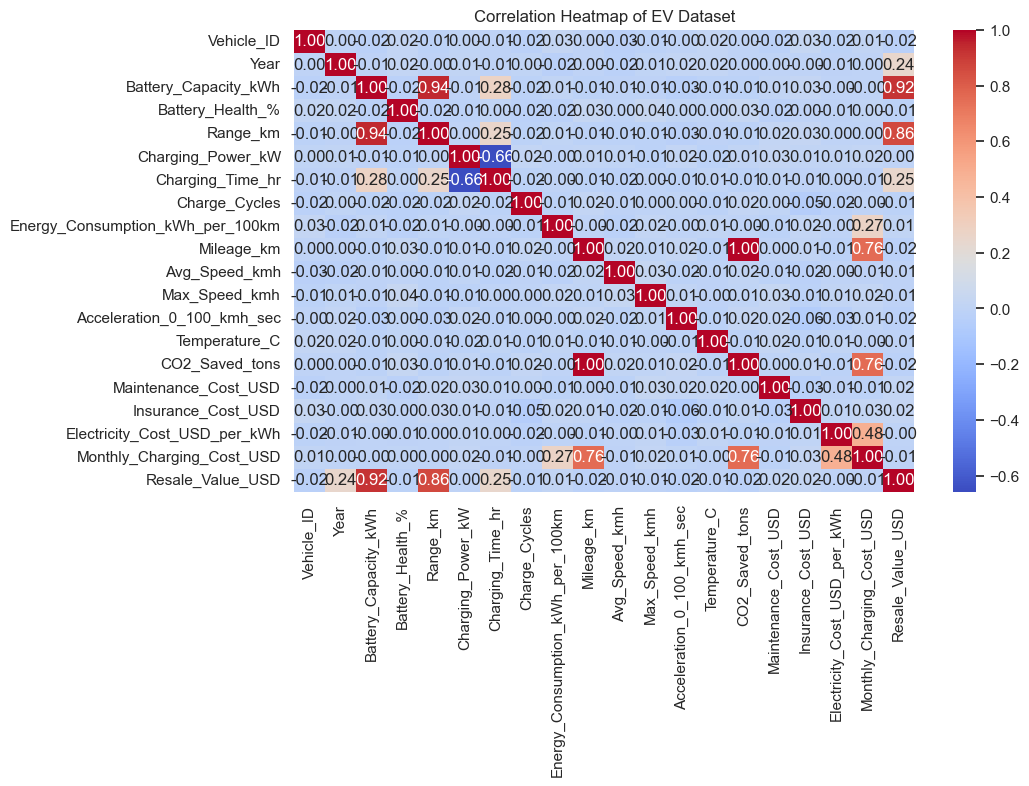

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of EV Dataset')
plt.show()

In [12]:
features = [
    'Year', 'Battery_Capacity_kWh', 'Battery_Health_%', 'Range_km',
    'Charging_Power_kW', 'Charging_Time_hr', 'Energy_Consumption_kWh_per_100km',
    'Mileage_km', 'Avg_Speed_kmh', 'Max_Speed_kmh', 'Acceleration_0_100_kmh_sec',
    'Temperature_C', 'CO2_Saved_tons', 'Maintenance_Cost_USD',
    'Insurance_Cost_USD', 'Electricity_Cost_USD_per_kWh', 'Monthly_Charging_Cost_USD'
]

X = df[features]
y = df['Resale_Value_USD']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1508.0595575472191
RMSE: 1736.3940562021605
R2 Score: 0.9016303866057871


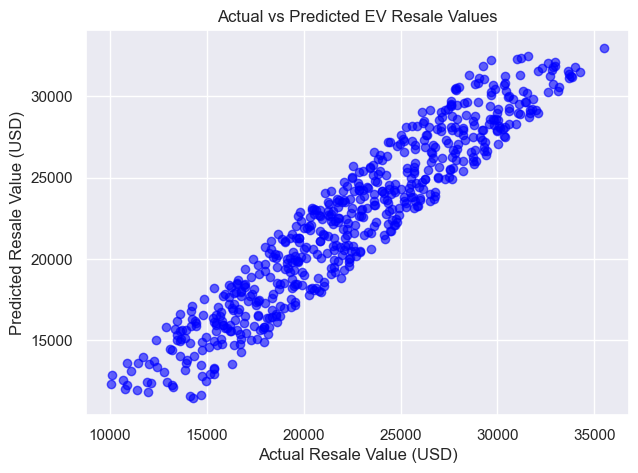

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Resale Value (USD)")
plt.ylabel("Predicted Resale Value (USD)")
plt.title("Actual vs Predicted EV Resale Values")
plt.show()

In [16]:
joblib.dump(model, "ev_price_prediction_model.pkl")
print(" Model saved as ev_price_prediction_model.pkl")


 Model saved as ev_price_prediction_model.pkl


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import joblib

model = joblib.load("ev_price_prediction_model.pkl")

sample_input = [[2022, 55, 95, 300, 120, 0.5, 14.5, 25000, 60, 150, 7.5, 25, 2.5, 400, 350, 0.13, 60]]
predicted_price = model.predict(sample_input)
print("Predicted EV Price (USD):", predicted_price[0])


Predicted EV Price (USD): 32887.92192294006


C:\Users\pratim sahoo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
